In [1]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime


from DMS2_utils import *
from create_trials_df import create_trials_df_from_dj
from dj_utils import return_date_window, ANIMAL_IDS
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
from plot_days_info import *


# settings
%load_ext autoreload
%autoreload 
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


[2023-07-06 11:24:56,522][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-07-06 11:24:56,680][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=20)

In [5]:
flex_date_min = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")
df = create_trials_df_from_dj(date_min=flex_date_min)

fetched 5 sessions for R610 between 2023-07-02 and 2023-07-06
fetched 5 sessions for R611 between 2023-07-02 and 2023-07-06
fetched 5 sessions for R612 between 2023-07-02 and 2023-07-06
fetched 5 sessions for R613 between 2023-07-02 and 2023-07-06
fetched 5 sessions for R614 between 2023-07-02 and 2023-07-06


In [6]:
make_daily_stage_plots(df, overwrite=False)

plotting stage 3 / 4 plot R610 on 2023-07-02
plotting stage 3 / 4 plot R611 on 2023-07-02
plotting stage 3 / 4 plot R612 on 2023-07-02
plotting stage 3 / 4 plot R613 on 2023-07-02
plotting stage 3 / 4 plot R614 on 2023-07-02
plotting stage 3 / 4 plot R610 on 2023-07-03
plotting stage 3 / 4 plot R611 on 2023-07-03
plotting stage 3 / 4 plot R612 on 2023-07-03
plotting stage 3 / 4 plot R613 on 2023-07-03
plotting stage 3 / 4 plot R614 on 2023-07-03
plotting stage 3 / 4 plot R610 on 2023-07-04
plotting stage 3 / 4 plot R611 on 2023-07-04
plotting stage 3 / 4 plot R612 on 2023-07-04
plotting stage 3 / 4 plot R613 on 2023-07-04
plotting stage 3 / 4 plot R614 on 2023-07-04
plotting stage 3 / 4 plot R610 on 2023-07-05
plotting stage 3 / 4 plot R611 on 2023-07-05
plotting stage 3 / 4 plot R612 on 2023-07-05
plotting stage 3 / 4 plot R613 on 2023-07-05
plotting stage 3 / 4 plot R614 on 2023-07-05
plotting stage 3 / 4 plot R610 on 2023-07-06
plotting stage 3 / 4 plot R611 on 2023-07-06
plotting s

In [7]:
days_df = lazy_load_days_summary_df(
    date_min=date_min, date_max=datetime.today().strftime("%Y-%m-%d"), save_out=True
)

partial dj load with new date min 2023-06-16 -> 2023-07-01
Returning appended df with entries between 2023-06-16 and 2023-07-06
Saved out appended df to c:\Users\JB\github\jbreda_animal_training\code\training_performance\days_df.csv


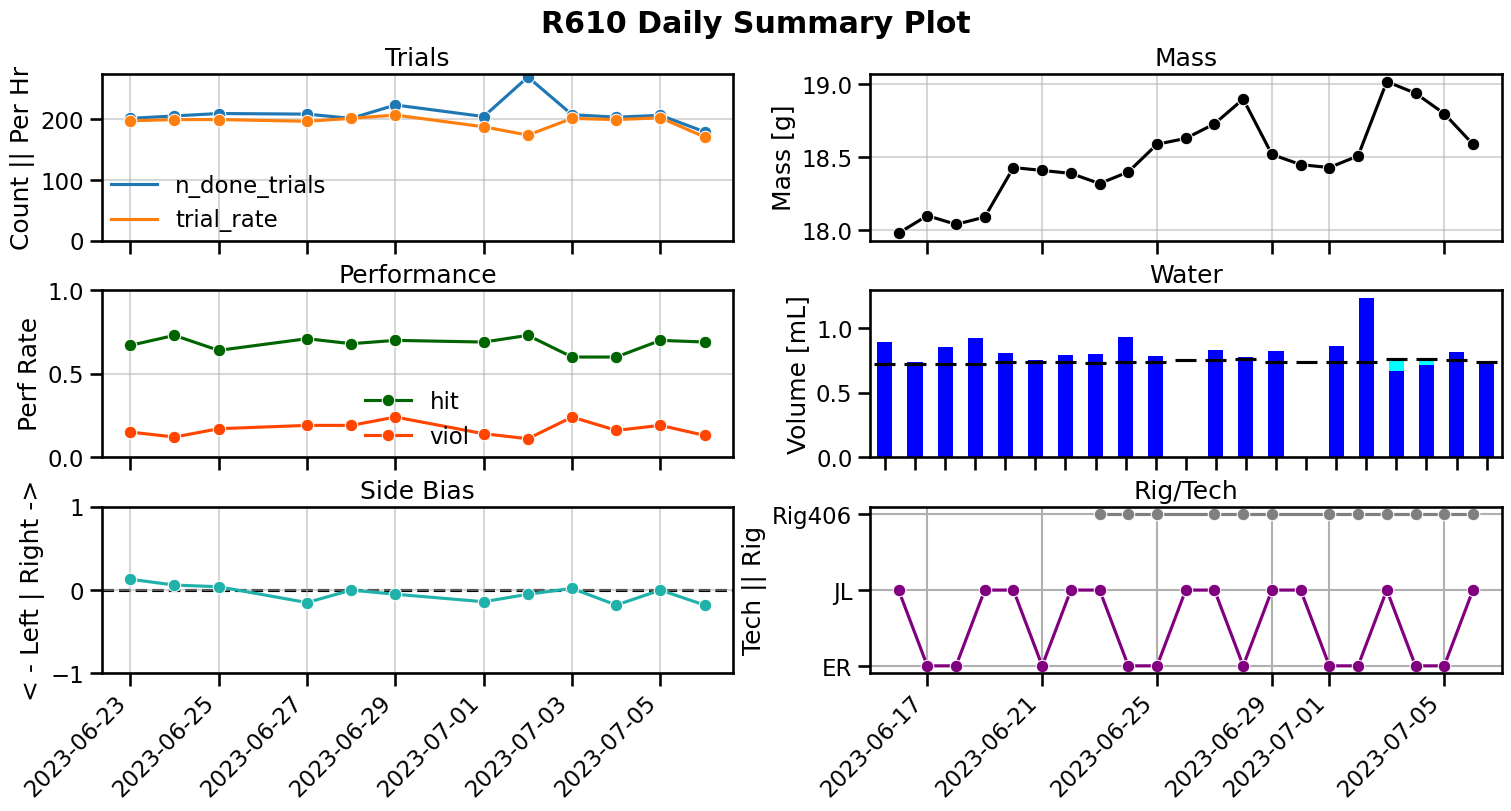

In [8]:
plot_multiday_summary("R610", days_df)

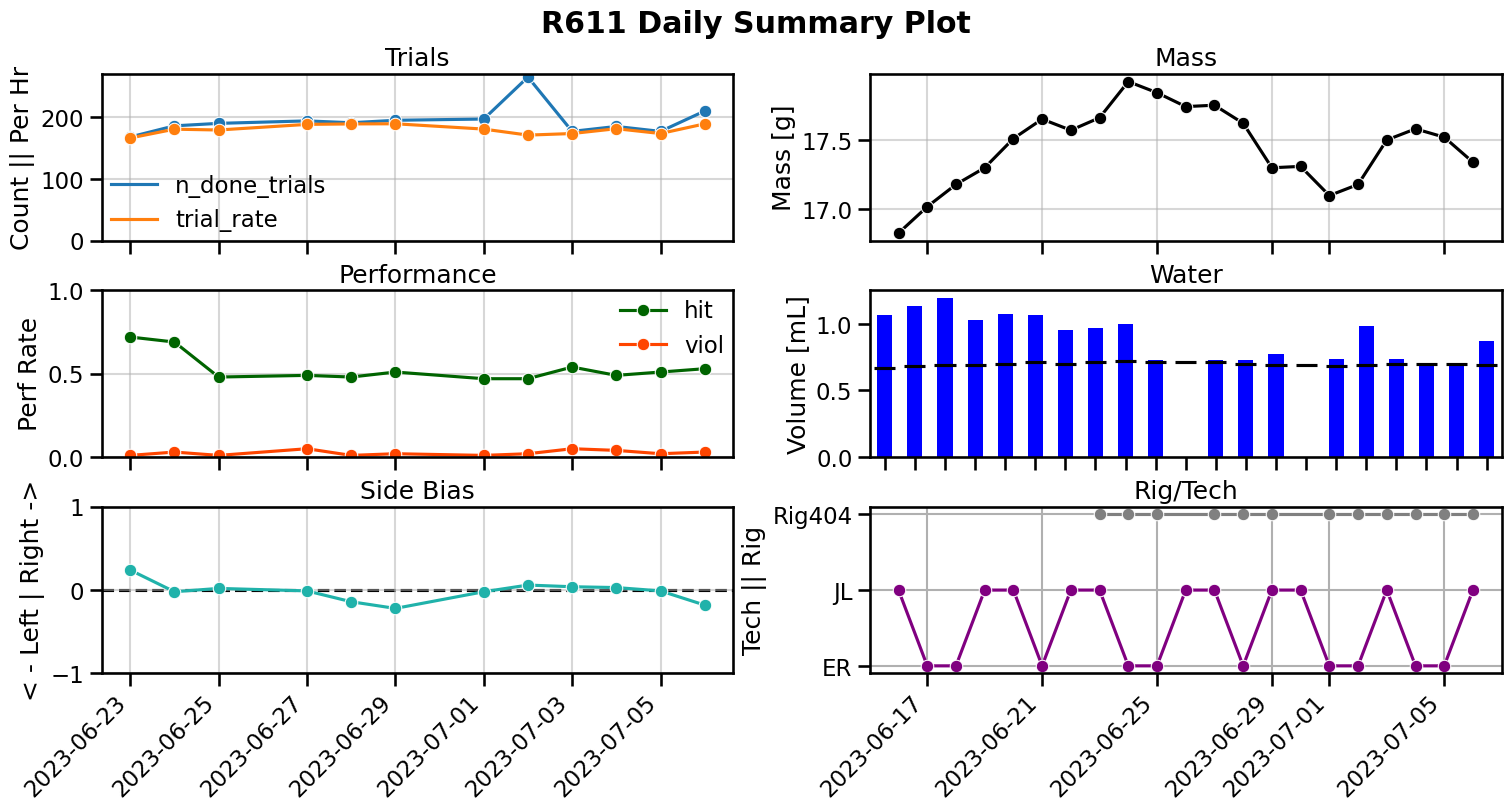

In [9]:
plot_multiday_summary("R611", days_df)

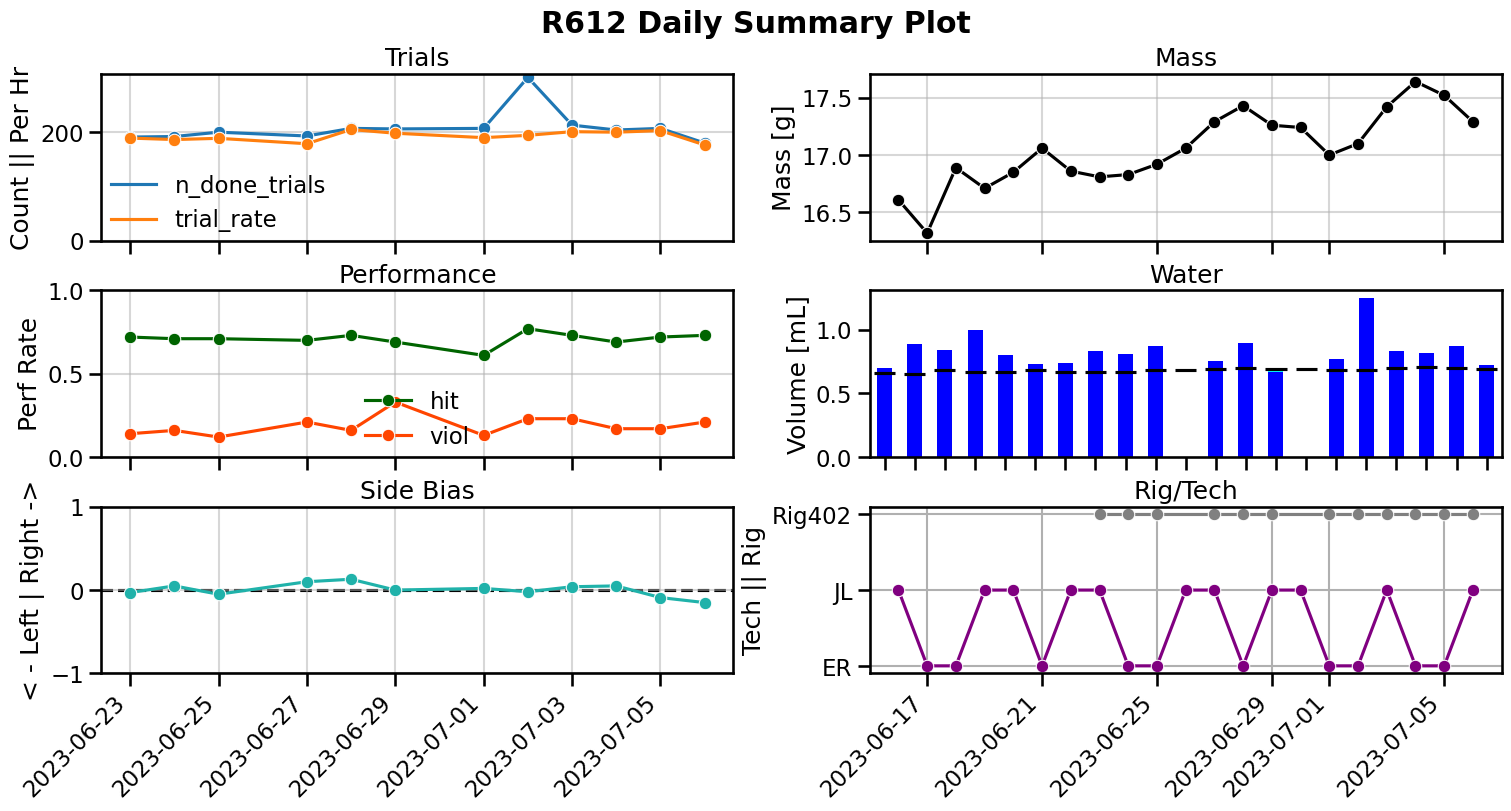

In [10]:
plot_multiday_summary("R612", days_df)

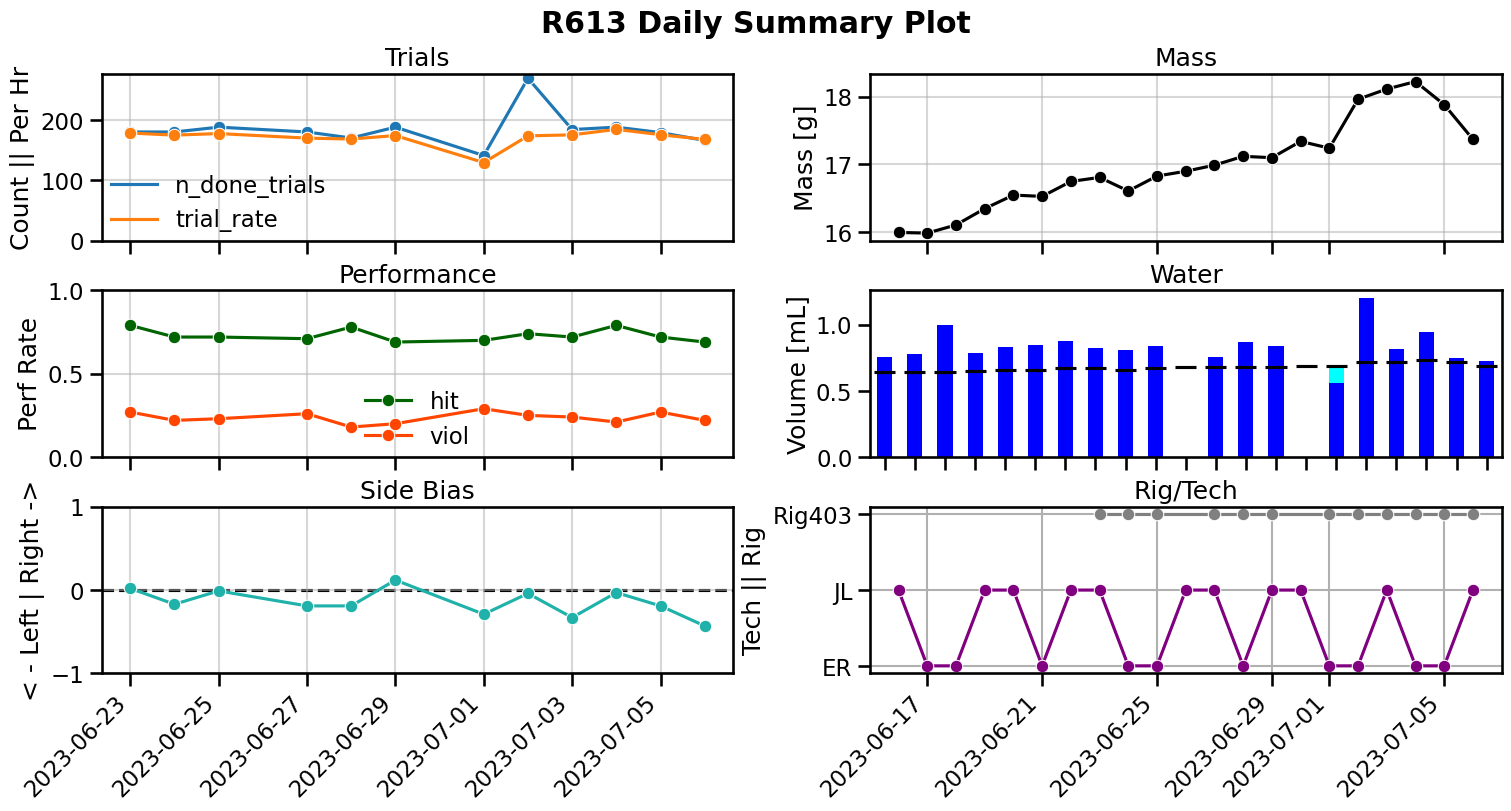

In [11]:
plot_multiday_summary("R613", days_df)

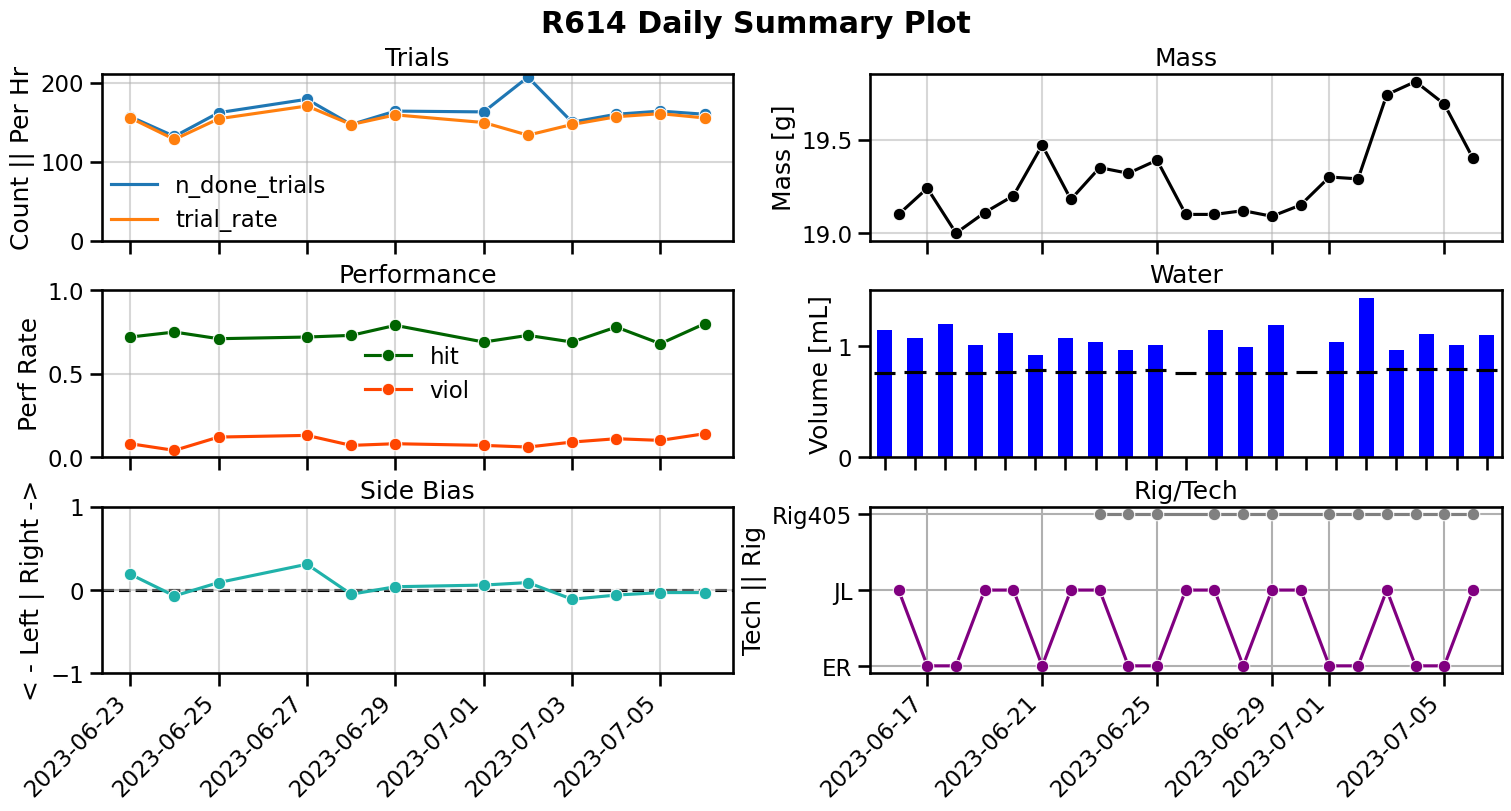

In [12]:
plot_multiday_summary("R614", days_df)

## DEV

In [13]:
# for animal_id, animal_df in days_df.groupby('animal_id'):
#     None
# from plot_days_info import *
# ## Initialize mutli-axis figure
# layout = """
#     AAABBB
#     CCCDDD
#     EEEFFF
# """
# fig = plt.figure(constrained_layout=True, figsize=(15,8))
# ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
# plt.suptitle(f"\nR614 Daily Summary Plot", fontweight="semibold")


# ## Plot
# # left column
# plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
# plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
# plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# # right column
# plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
# plot_water_restriction(animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False)
# plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)

# # plots to add
# # stage plot X
# # time to spoke (or cpoke eventually) *
# # delay dur X
# # trial result plot (stacked or unstacked option, unstacked might be better) X
# # antibias params X
# ## eventually!
# # sessions start time
# # pre go/ viol off X
# # settling, pre go, sa, delay, sb, post sb times across days X
# add go cue dur if go is on?
# # give info, sma info, etc (maybe on oneof those dot plots)
# #
# # stimulus information